In [1]:
!pip install mapclassify contextily
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mapclassify
import os
import contextily as cx
# Carregar o painel final
caminho_painel = '/content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/input/painel_final_pe.parquet'
df = pd.read_parquet(caminho_painel)
plt.style.use('ggplot')

In [2]:
df.columns

Index(['cod_municipio', 'ano', 'populacao_estimada',
       'pib_per_capita_deflacionado', 'densidade_populacional',
       'taxa_arboviroses', 'taxa_esquisto', 'taxa_febretifoide', 'taxa_lepto',
       'dias_chuva_extrema', 'volume_total_chuva_extrema_mm',
       'cobertura_agua_linear', 'cobertura_esgoto_linear',
       'cobertura_agua_suave', 'cobertura_esgoto_suave'],
      dtype='object')

In [6]:
# --- 1. Tabela de Estatísticas Descritivas ---
print("--- Tabela de Estatísticas Descritivas ---")
# Selecionar as colunas de interesse e transpor (.T) para melhor visualização
stats_descritivas = round(df[['taxa_lepto', 'taxa_arboviroses', 'taxa_esquisto', 'taxa_febretifoide',
                              'volume_total_chuva_extrema_mm', 'dias_chuva_extrema',
                              'cobertura_esgoto_suave', 'cobertura_agua_suave',
                              'pib_per_capita_deflacionado', 'densidade_populacional']].describe().T,2)
display(stats_descritivas)

--- Tabela de Estatísticas Descritivas ---


,count,mean,std,min,25%,50%,75%,max
taxa_lepto,3700.0,0.76,2.81,0.00,0.00,0.00,0.00,68.26
taxa_arboviroses,3700.0,305.80,776.80,0.00,18.77,72.14,269.90,22834.39
taxa_esquisto,3700.0,36.91,156.62,0.00,0.00,0.00,4.87,2757.39
taxa_febretifoide,3700.0,0.09,0.82,0.00,0.00,0.00,0.00,17.13
volume_total_chuva_extrema_mm,3700.0,3711.99,2881.60,0.00,1941.60,2920.75,4430.25,27140.71
dias_chuva_extrema,3700.0,101.15,33.04,0.00,78.00,98.00,123.00,241.00
cobertura_esgoto_suave,3700.0,44.43,20.07,0.65,29.26,45.30,59.50,91.23
cobertura_agua_suave,3700.0,60.79,18.77,2.18,48.40,60.83,76.94,95.95
pib_per_capita_deflacionado,3700.0,12645.57,12046.35,3547.83,7973.84,9913.41,13314.68,158202.69
densidade_populacional,3700.0,252.40,928.82,7.08,40.21,89.03,163.25,9619.08


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


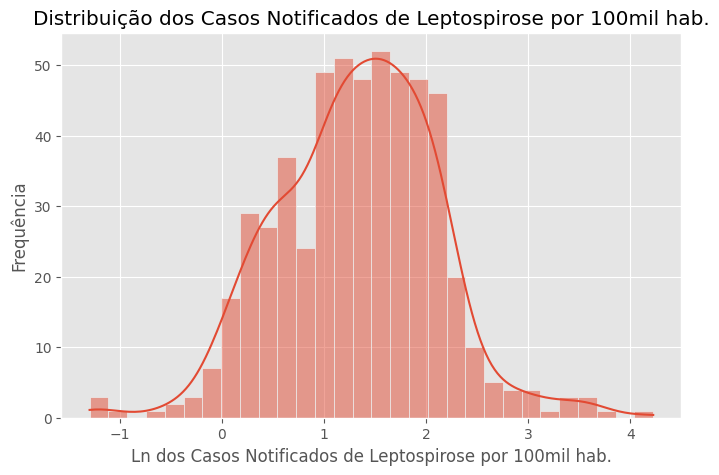

In [ ]:
# --- 2. Gráfico de Distribuição (Exemplo para Leptospirose) ---
plt.figure(figsize=(8, 5))
sns.histplot(np.log(df['taxa_lepto']), kde=True, bins=30)
plt.title('Distribuição dos Casos Notificados de Leptospirose por 100mil hab.')
plt.xlabel('Ln dos Casos Notificados de Leptospirose por 100mil hab.')
plt.ylabel('Frequência')
plt.savefig('/content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/output/graphs/dist_taxa_lepto.png')
plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


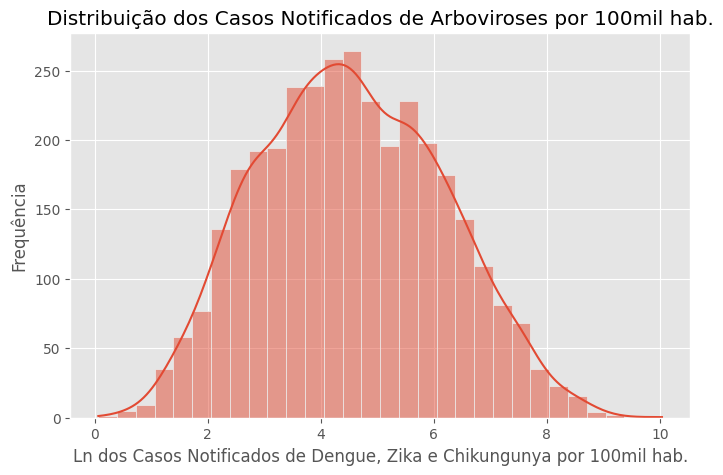

In [ ]:
# --- 2. Gráfico de Distribuição (Exemplo para Arboviroses) ---
plt.figure(figsize=(8, 5))
sns.histplot(np.log(df['taxa_arboviroses']), kde=True, bins=30)
plt.title('Distribuição dos Casos Notificados de Arboviroses por 100mil hab.')
plt.xlabel('Ln dos Casos Notificados de Dengue, Zika e Chikungunya por 100mil hab.')
plt.ylabel('Frequência')
plt.savefig('/content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/output/graphs/dist_taxa_arboviroses.png')
plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


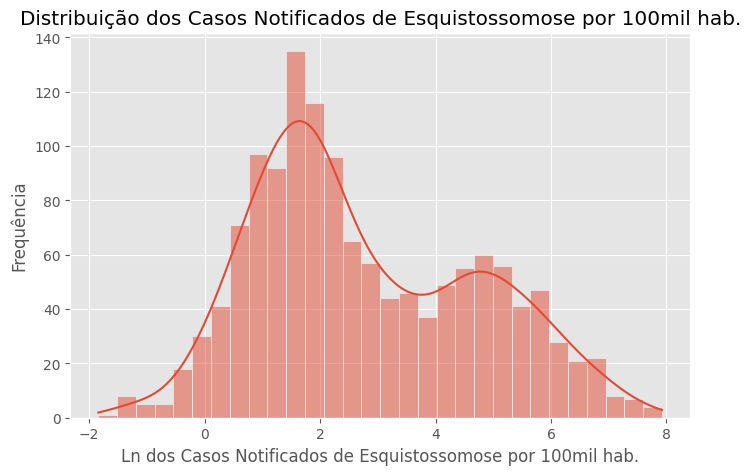

In [ ]:
# --- 2. Gráfico de Distribuição (Exemplo para Esquistossomose) ---
plt.figure(figsize=(8, 5))
sns.histplot(np.log(df['taxa_esquisto']), kde=True, bins=30)
plt.title('Distribuição dos Casos Notificados de Esquistossomose por 100mil hab.')
plt.xlabel('Ln dos Casos Notificados de Esquistossomose por 100mil hab.')
plt.ylabel('Frequência')
plt.savefig('/content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/output/graphs/dist_taxa_esquistossomose.png')
plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


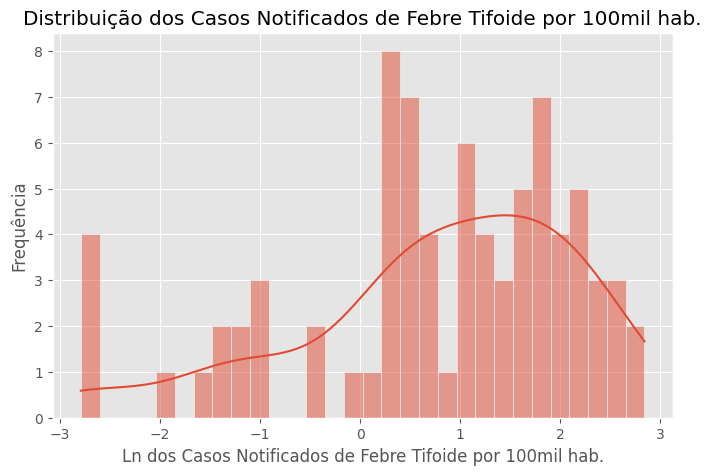

In [ ]:
# --- 2. Gráfico de Distribuição (Exemplo para Febre Tifoide) ---
plt.figure(figsize=(8, 5))
sns.histplot(np.log(df['taxa_febretifoide']), kde=True, bins=30)
plt.title('Distribuição dos Casos Notificados de Febre Tifoide por 100mil hab.')
plt.xlabel('Ln dos Casos Notificados de Febre Tifoide por 100mil hab.')
plt.ylabel('Frequência')
plt.savefig('/content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/output/graphs/dist_taxa_frebretifoide.png')
plt.show()

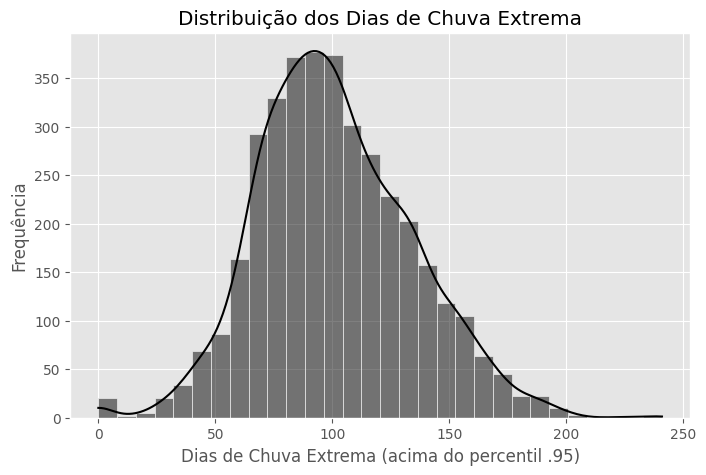

In [ ]:
# --- 2. Gráfico de Distribuição (Exemplo para Chuva Extrema) ---
plt.figure(figsize=(8, 5))
sns.histplot(df['dias_chuva_extrema'], kde=True, bins=30, color='black')
plt.title('Distribuição dos Dias de Chuva Extrema')
plt.xlabel('Dias de Chuva Extrema (acima do percentil .95)')
plt.ylabel('Frequência')
plt.savefig('/content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/output/graphs/dist_dias_chuva_extrema.png')
plt.show()

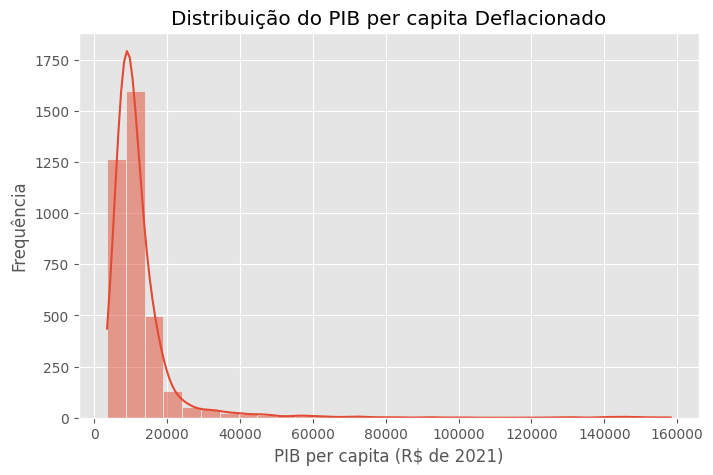

In [ ]:
# --- 2. Gráfico de Distribuição (Exemplo para PIB) ---
plt.figure(figsize=(8, 5))
sns.histplot(df['pib_per_capita_deflacionado'], kde=True, bins=30)
plt.title('Distribuição do PIB per capita Deflacionado')
plt.xlabel('PIB per capita (R$ de 2021)')
plt.ylabel('Frequência')
plt.savefig('/content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/output/graphs/dist_pib_pc.png')
plt.show()

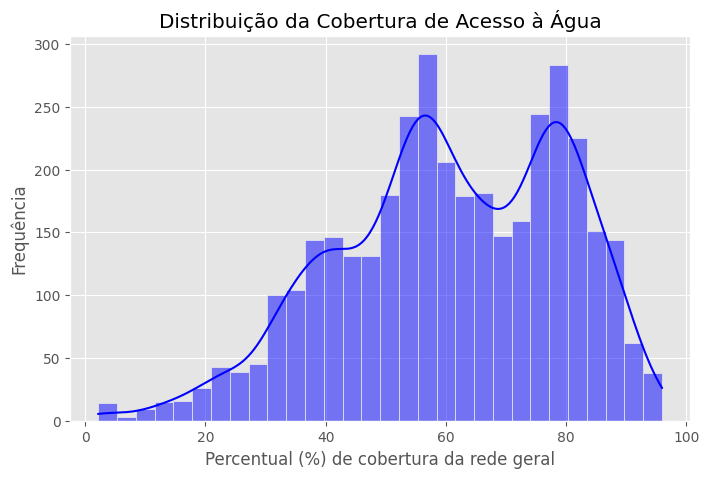

In [ ]:
# --- 2. Gráfico de Distribuição (Água) ---
plt.figure(figsize=(8, 5))
sns.histplot(df['cobertura_agua_suave'], kde=True, bins=30, color='blue')
plt.title('Distribuição da Cobertura de Acesso à Água')
plt.xlabel('Percentual (%) de cobertura da rede geral')
plt.ylabel('Frequência')
plt.savefig('/content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/output/graphs/dist_cobertura_agua.png')
plt.show()

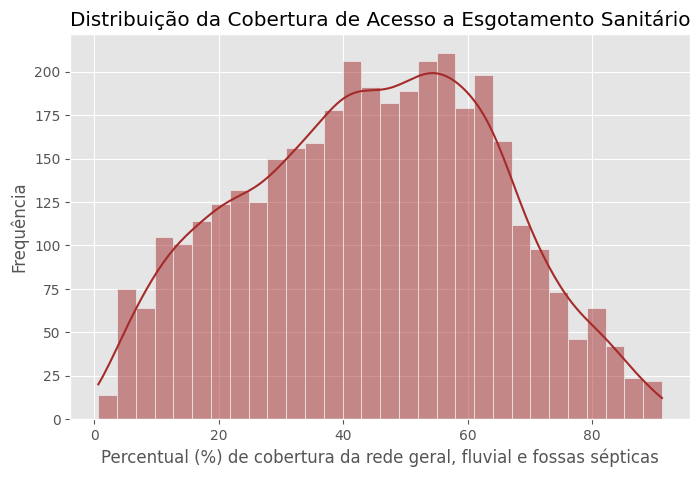

In [ ]:
# --- 2. Gráfico de Distribuição (Esgoto) ---
plt.figure(figsize=(8, 5))
sns.histplot(df['cobertura_esgoto_suave'], kde=True, bins=30, color='brown')
plt.title('Distribuição da Cobertura de Acesso a Esgotamento Sanitário')
plt.xlabel('Percentual (%) de cobertura da rede geral, fluvial e fossas sépticas')
plt.ylabel('Frequência')
plt.savefig('/content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/output/graphs/dist_cobertura_esgoto.png')
plt.show()

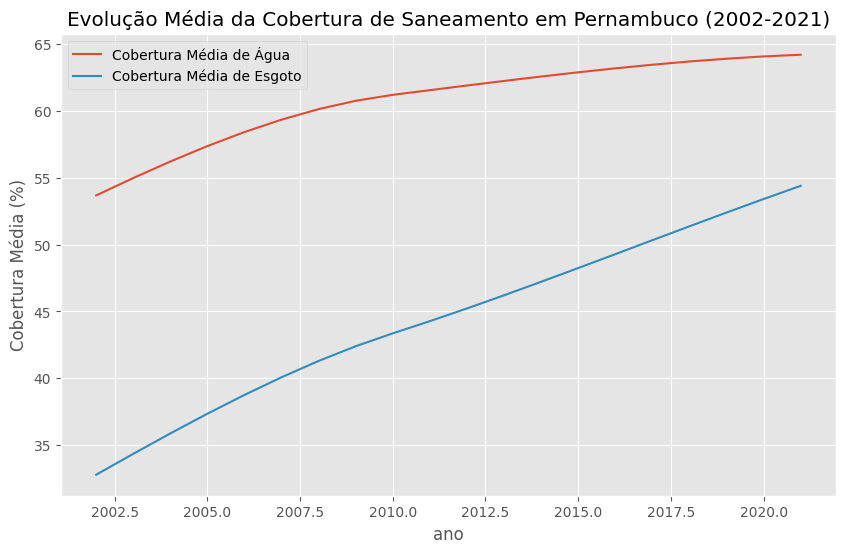

In [ ]:
# --- 3. Gráfico de Tendência Temporal (Exemplo para Saneamento) ---
df_temporal = df.groupby('ano')[['cobertura_agua_suave', 'cobertura_esgoto_suave']].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_temporal, x='ano', y='cobertura_agua_suave', label='Cobertura Média de Água')
sns.lineplot(data=df_temporal, x='ano', y='cobertura_esgoto_suave', label='Cobertura Média de Esgoto')
plt.title('Evolução Média da Cobertura de Saneamento em Pernambuco (2002-2021)')
plt.ylabel('Cobertura Média (%)')
plt.legend()
plt.savefig('/content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/output/graphs/evolucao_saneamento.png')
plt.show()

In [11]:
caminho_shapefile = '/content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/build/input/PE_Municipios_2024.zip'
gdf_pe = gpd.read_file(caminho_shapefile)
# Garantir que o código do município no shapefile é do tipo correto para o merge
gdf_pe['cod_municipio'] = gdf_pe['CD_MUN'].astype('int64')

df_2002 = df.loc[df['ano'] == 2002, ['cod_municipio', 'cobertura_esgoto_suave']].rename(columns={'cobertura_esgoto_suave': 'cobertura_2002'})
df_2021 = df.loc[df['ano'] == 2021, ['cod_municipio', 'cobertura_esgoto_suave']].rename(columns={'cobertura_esgoto_suave': 'cobertura_2021'})
df_mapa = pd.merge(df_2002, df_2021, on='cod_municipio')

num_anos = 2021 - 2002
df_mapa['cagr_esgoto'] = np.where(
    df_mapa['cobertura_2002'] > 0,
    ((df_mapa['cobertura_2021'] / df_mapa['cobertura_2002'])**(1/num_anos)) - 1,
    np.where(df_mapa['cobertura_2021'] > 0, 1, 0)
)
df_mapa['cagr_esgoto_pct'] = df_mapa['cagr_esgoto'] * 100
gdf_mapa_final = gdf_pe.merge(df_mapa, on='cod_municipio', how='left')

gdf_mapa_final = gdf_mapa_final.to_crs(epsg=3857)
# ---
# ETAPA 5: Gerar os Mapas Individuais (VERSÃO REFINADA)
# ---
print("--- Gerando os mapas individuais... ---")

# Definir o caminho da pasta de saída
pasta_saida = '/content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/output/maps'

# Criar a pasta se ela não existir
os.makedirs(pasta_saida, exist_ok=True)

# Definir o número de classes para as quebras naturais
numero_de_classes = 5


# --- Mapa 1: Cobertura em 2002 ---
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
gdf_mapa_final.plot(
    column='cobertura_2002',
    ax=ax,
    legend=True,
    scheme='natural_breaks',
    k=numero_de_classes,
    cmap='YlGnBu',
    legend_kwds={'title': "Cobertura de Esgoto (%)", 'loc': 'lower right',
                 'fontsize': 15, 'title_fontsize': 18}
)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)
ax.set_title('Cobertura de Esgoto em Pernambuco (2002)', fontsize=24)
ax.axis('off')
plt.tight_layout()
caminho_mapa1 = os.path.join(pasta_saida, 'mapa_cobertura_esgoto_2002.png')
plt.savefig(caminho_mapa1, dpi=300)
print(f"Mapa 1 salvo em: {caminho_mapa1}")
plt.close(fig) # Fechar a figura para liberar memória


# --- Mapa 2: Cobertura em 2021 ---
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
gdf_mapa_final.plot(
    column='cobertura_2021',
    ax=ax,
    legend=True,
    scheme='natural_breaks',
    k=numero_de_classes,
    cmap='YlGnBu',
    legend_kwds={'title': "Cobertura de Esgoto (%)", 'loc': 'lower right','fontsize': 15,
        'title_fontsize': 18}
)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)
ax.set_title('Cobertura de Esgoto em Pernambuco (2021)', fontsize=24)
ax.axis('off')
plt.tight_layout()
caminho_mapa2 = os.path.join(pasta_saida, 'mapa_cobertura_esgoto_2021.png')
plt.savefig(caminho_mapa2, dpi=300)
print(f"Mapa 2 salvo em: {caminho_mapa2}")
plt.close(fig)


# --- Mapa 3: Taxa de Crescimento Anual (CAGR) ---
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
gdf_mapa_final.plot(
    column='cagr_esgoto_pct',
    ax=ax,
    legend=True,
    scheme='natural_breaks',
    k=numero_de_classes,
    cmap='OrRd',
    legend_kwds={
        'title': "Crescimento Anual (% a.a.)",
        'loc': 'lower right',
        'fontsize': 15,
        'title_fontsize': 18
    }
)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)
ax.set_title('Crescimento Anual da Cobertura de Esgoto (2002-2021)', fontsize=24)
ax.axis('off')
plt.tight_layout()
caminho_mapa3 = os.path.join(pasta_saida, 'mapa_cagr_esgoto_02-21.png')
plt.savefig(caminho_mapa3, dpi=300)
print(f"Mapa 3 salvo em: {caminho_mapa3}")
plt.close(fig)

--- Gerando os mapas individuais... ---
Mapa 1 salvo em: /content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/output/maps/mapa_cobertura_esgoto_2002.png
Mapa 2 salvo em: /content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/output/maps/mapa_cobertura_esgoto_2021.png
Mapa 3 salvo em: /content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/output/maps/mapa_cagr_esgoto_02-21.png


In [10]:
df_2002 = df.loc[df['ano'] == 2002, ['cod_municipio', 'cobertura_agua_suave']].rename(columns={'cobertura_agua_suave': 'cobertura_2002'})
df_2021 = df.loc[df['ano'] == 2021, ['cod_municipio', 'cobertura_agua_suave']].rename(columns={'cobertura_agua_suave': 'cobertura_2021'})
df_mapa = pd.merge(df_2002, df_2021, on='cod_municipio')

num_anos = 2021 - 2002
df_mapa['cagr_agua'] = np.where(
    df_mapa['cobertura_2002'] > 0,
    ((df_mapa['cobertura_2021'] / df_mapa['cobertura_2002'])**(1/num_anos)) - 1,
    np.where(df_mapa['cobertura_2021'] > 0, 1, 0)
)
df_mapa['cagr_agua_pct'] = df_mapa['cagr_agua'] * 100
gdf_mapa_final = gdf_pe.merge(df_mapa, on='cod_municipio', how='left')

gdf_mapa_final = gdf_mapa_final.to_crs(epsg=3857)
# ---
# ETAPA 5: Gerar os Mapas Individuais (VERSÃO REFINADA)
# ---
print("--- Gerando os mapas individuais... ---")

# Definir o caminho da pasta de saída
pasta_saida = '/content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/output/maps'

# Criar a pasta se ela não existir
os.makedirs(pasta_saida, exist_ok=True)

# Definir o número de classes para as quebras naturais
numero_de_classes = 5


# --- Mapa 1: Cobertura em 2002 ---
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
gdf_mapa_final.plot(
    column='cobertura_2002',
    ax=ax,
    legend=True,
    scheme='natural_breaks',
    k=numero_de_classes,
    cmap='YlGnBu',
    legend_kwds={'title': "Cobertura de Água (%)", 'loc': 'lower right',
                 'fontsize': 15, 'title_fontsize': 18}
)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)
ax.set_title('Cobertura de Água em Pernambuco (2002)', fontsize=24)
ax.axis('off')
plt.tight_layout()
caminho_mapa1 = os.path.join(pasta_saida, 'mapa_cobertura_agua_2002.png')
plt.savefig(caminho_mapa1, dpi=300)
print(f"Mapa 1 salvo em: {caminho_mapa1}")
plt.close(fig) # Fechar a figura para liberar memória


# --- Mapa 2: Cobertura em 2021 ---
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
gdf_mapa_final.plot(
    column='cobertura_2021',
    ax=ax,
    legend=True,
    scheme='natural_breaks',
    k=numero_de_classes,
    cmap='YlGnBu',
    legend_kwds={'title': "Cobertura de Água (%)", 'loc': 'lower right','fontsize': 15,
        'title_fontsize': 18}
)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)
ax.set_title('Cobertura de Água em Pernambuco (2021)', fontsize=24)
ax.axis('off')
plt.tight_layout()
caminho_mapa2 = os.path.join(pasta_saida, 'mapa_cobertura_agua_2021.png')
plt.savefig(caminho_mapa2, dpi=300)
print(f"Mapa 2 salvo em: {caminho_mapa2}")
plt.close(fig)


# --- Mapa 3: Taxa de Crescimento Anual (CAGR) ---
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
gdf_mapa_final.plot(
    column='cagr_agua_pct',
    ax=ax,
    legend=True,
    scheme='natural_breaks',
    k=numero_de_classes,
    cmap='OrRd',
    legend_kwds={
        'title': "Crescimento Anual (% a.a.)",
        'loc': 'lower right',
        'fontsize': 15,
        'title_fontsize': 18
    }
)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)
ax.set_title('Crescimento Anual da Cobertura de Água (2002-2021)', fontsize=24)
ax.axis('off')
plt.tight_layout()
caminho_mapa3 = os.path.join(pasta_saida, 'mapa_cagr_agua_02-21.png')
plt.savefig(caminho_mapa3, dpi=300)
print(f"Mapa 3 salvo em: {caminho_mapa3}")
plt.close(fig)

--- Gerando os mapas individuais... ---
Mapa 1 salvo em: /content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/output/maps/mapa_cobertura_agua_2002.png
Mapa 2 salvo em: /content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/output/maps/mapa_cobertura_agua_2021.png
Mapa 3 salvo em: /content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/output/maps/mapa_cagr_agua_02-21.png


In [14]:
df_2002 = df.loc[df['ano'] == 2002, ['cod_municipio', 'dias_chuva_extrema']].rename(columns={'dias_chuva_extrema': 'chuva_2002'})
df_2021 = df.loc[df['ano'] == 2021, ['cod_municipio', 'dias_chuva_extrema']].rename(columns={'dias_chuva_extrema': 'chuva_2021'})
df_mapa = pd.merge(df_2002, df_2021, on='cod_municipio')

num_anos = 2021 - 2002
df_mapa['cagr_chuva'] = np.where(
    df_mapa['chuva_2002'] > 0,
    ((df_mapa['chuva_2021'] / df_mapa['chuva_2002'])**(1/num_anos)) - 1,
    np.where(df_mapa['chuva_2021'] > 0, 1, 0)
)
df_mapa['cagr_chuva_pct'] = df_mapa['cagr_chuva'] * 100
gdf_mapa_final = gdf_pe.merge(df_mapa, on='cod_municipio', how='left')

gdf_mapa_final = gdf_mapa_final.to_crs(epsg=3857)
# ---
# ETAPA 5: Gerar os Mapas Individuais (VERSÃO REFINADA)
# ---
print("--- Gerando os mapas individuais... ---")

# Definir o caminho da pasta de saída
pasta_saida = '/content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/output/maps'

# Criar a pasta se ela não existir
os.makedirs(pasta_saida, exist_ok=True)

# Definir o número de classes para as quebras naturais
numero_de_classes = 5


# --- Mapa 1: Cobertura em 2002 ---
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
gdf_mapa_final.plot(
    column='chuva_2002',
    ax=ax,
    legend=True,
    scheme='natural_breaks',
    k=numero_de_classes,
    cmap='YlGnBu',
    legend_kwds={'title': "Dias de Chuva Extrema", 'loc': 'lower right',
                 'fontsize': 15, 'title_fontsize': 18}
)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)
ax.set_title('Dias de Chuva Extrema em Pernambuco (2002)', fontsize=24)
ax.axis('off')
plt.tight_layout()
caminho_mapa1 = os.path.join(pasta_saida, 'mapa_volume_chuva_extrema_2002.png')
plt.savefig(caminho_mapa1, dpi=300)
print(f"Mapa 1 salvo em: {caminho_mapa1}")
plt.close(fig) # Fechar a figura para liberar memória


# --- Mapa 2: Cobertura em 2021 ---
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
gdf_mapa_final.plot(
    column='chuva_2021',
    ax=ax,
    legend=True,
    scheme='natural_breaks',
    k=numero_de_classes,
    cmap='YlGnBu',
    legend_kwds={'title': "Dias de Chuva Extrema", 'loc': 'lower right','fontsize': 15,
        'title_fontsize': 18}
)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)
ax.set_title('Dias de Chuva Extrema em Pernambuco (2021)', fontsize=24)
ax.axis('off')
plt.tight_layout()
caminho_mapa2 = os.path.join(pasta_saida, 'mapa_volume_chuva_extrema_2021.png')
plt.savefig(caminho_mapa2, dpi=300)
print(f"Mapa 2 salvo em: {caminho_mapa2}")
plt.close(fig)


# --- Mapa 3: Taxa de Crescimento Anual (CAGR) ---
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
gdf_mapa_final.plot(
    column='cagr_chuva_pct',
    ax=ax,
    legend=True,
    scheme='natural_breaks',
    k=numero_de_classes,
    cmap='OrRd',
    legend_kwds={
        'title': "Crescimento Anual (% a.a.)",
        'loc': 'lower right',
        'fontsize': 15,
        'title_fontsize': 18
    }
)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)
ax.set_title('Crescimento Anual de Dias de Chuva Extrema (2002-2021)', fontsize=24)
ax.axis('off')
plt.tight_layout()
caminho_mapa3 = os.path.join(pasta_saida, 'mapa_cagr_volume_chuva_02-21.png')
plt.savefig(caminho_mapa3, dpi=300)
print(f"Mapa 3 salvo em: {caminho_mapa3}")
plt.close(fig)

--- Gerando os mapas individuais... ---
Mapa 1 salvo em: /content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/output/maps/mapa_chuva_extrema_2002.png
Mapa 2 salvo em: /content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/output/maps/mapa_chuva_extrema_2021.png
Mapa 3 salvo em: /content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/output/maps/mapa_cagr_chuva_02-21.png


In [16]:
df_2002 = df.loc[df['ano'] == 2002, ['cod_municipio', 'volume_total_chuva_extrema_mm']].rename(columns={'volume_total_chuva_extrema_mm': 'volume_chuva_2002'})
df_2021 = df.loc[df['ano'] == 2021, ['cod_municipio', 'volume_total_chuva_extrema_mm']].rename(columns={'volume_total_chuva_extrema_mm': 'volume_chuva_2021'})
df_mapa = pd.merge(df_2002, df_2021, on='cod_municipio')

num_anos = 2021 - 2002
df_mapa['cagr_volume_chuva'] = np.where(
    df_mapa['volume_chuva_2002'] > 0,
    ((df_mapa['volume_chuva_2021'] / df_mapa['volume_chuva_2002'])**(1/num_anos)) - 1,
    np.where(df_mapa['volume_chuva_2021'] > 0, 1, 0)
)
df_mapa['cagr_volume_chuva_pct'] = df_mapa['cagr_volume_chuva'] * 100
gdf_mapa_final = gdf_pe.merge(df_mapa, on='cod_municipio', how='left')

gdf_mapa_final = gdf_mapa_final.to_crs(epsg=3857)
# ---
# ETAPA 5: Gerar os Mapas Individuais (VERSÃO REFINADA)
# ---
print("--- Gerando os mapas individuais... ---")

# Definir o caminho da pasta de saída
pasta_saida = '/content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/output/maps'

# Criar a pasta se ela não existir
os.makedirs(pasta_saida, exist_ok=True)

# Definir o número de classes para as quebras naturais
numero_de_classes = 5


# --- Mapa 1: Cobertura em 2002 ---
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
gdf_mapa_final.plot(
    column='volume_chuva_2002',
    ax=ax,
    legend=True,
    scheme='natural_breaks',
    k=numero_de_classes,
    cmap='YlGnBu',
    legend_kwds={'title': "Volume de precipitação (mm)", 'loc': 'lower right',
                 'fontsize': 15, 'title_fontsize': 18}
)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)
ax.set_title('Volume de precipitação (mm) em dias de Chuva Extrema em Pernambuco (2002)', fontsize=24)
ax.axis('off')
plt.tight_layout()
caminho_mapa1 = os.path.join(pasta_saida, 'mapa_chuva_extrema_2002.png')
plt.savefig(caminho_mapa1, dpi=300)
print(f"Mapa 1 salvo em: {caminho_mapa1}")
plt.close(fig) # Fechar a figura para liberar memória


# --- Mapa 2: Cobertura em 2021 ---
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
gdf_mapa_final.plot(
    column='volume_chuva_2021',
    ax=ax,
    legend=True,
    scheme='natural_breaks',
    k=numero_de_classes,
    cmap='YlGnBu',
    legend_kwds={'title': "Volume de precipitação (mm)", 'loc': 'lower right','fontsize': 15,
        'title_fontsize': 18}
)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)
ax.set_title('Volume de precipitação (mm) em dias de Chuva Extrema em Pernambuco (2021)', fontsize=24)
ax.axis('off')
plt.tight_layout()
caminho_mapa2 = os.path.join(pasta_saida, 'mapa_chuva_extrema_2021.png')
plt.savefig(caminho_mapa2, dpi=300)
print(f"Mapa 2 salvo em: {caminho_mapa2}")
plt.close(fig)


# --- Mapa 3: Taxa de Crescimento Anual (CAGR) ---
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
gdf_mapa_final.plot(
    column='cagr_volume_chuva_pct',
    ax=ax,
    legend=True,
    scheme='natural_breaks',
    k=numero_de_classes,
    cmap='OrRd',
    legend_kwds={
        'title': "Crescimento Anual (% a.a.)",
        'loc': 'lower right',
        'fontsize': 15,
        'title_fontsize': 18
    }
)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)
ax.set_title('Crescimento Anual de precipitação (mm) em dias de Chuva Extrema (2002-2021)', fontsize=24)
ax.axis('off')
plt.tight_layout()
caminho_mapa3 = os.path.join(pasta_saida, 'mapa_cagr_volume_chuva_02-21.png')
plt.savefig(caminho_mapa3, dpi=300)
print(f"Mapa 3 salvo em: {caminho_mapa3}")
plt.close(fig)

--- Gerando os mapas individuais... ---
Mapa 1 salvo em: /content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/output/maps/mapa_chuva_extrema_2002.png
Mapa 2 salvo em: /content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/output/maps/mapa_chuva_extrema_2021.png
Mapa 3 salvo em: /content/drive/MyDrive/02 - Economia (UFPE)/2025.1/Tópicos de Macro (Economia do clima)/analise-saneamento-chuva-extrema-pe/analysis/output/maps/mapa_cagr_volume_chuva_02-21.png
